主成分分析(Principal Component Analysis, PCA)
===
LDA虽然可以进行数据降维，但是它的主要作用还是进行分类的。PCA主成分分析的主要作用则是进行数据降维。


# 1.数据降维
有时候，由于以下原因需要对数据进行简化:
- 使得数据集更容易使用
- 降低很多算法的计算开销
- 去除噪音
- 使得结果易懂

下面我们介绍数据降维的三种技术：因子分解、独立成分分析与主成分分析


# 2.因子分析(Factor Analysis)
- 通俗理解：将多个实测变量转换为少数几个综合指标。它反映一种降维的思想，通过降维将相关性高的变量聚在一起,从
而减少需要分析的变量的数量,而减少问题分析的复杂性
- 例如： 考察一个人的整体情况，就直接组合3样成绩(隐变量)，看平均成绩就行(存在：数学、语文、英语成绩)
- 应用的领域：社会科学、金融和其他领域
- 在因子分析中，我们
- 假设观察数据的成分中有一些观察不到的隐变量(latent variable)。
- 假设观察数据是这些隐变量和某些噪音的线性组合。
- 那么隐变量的数据可能比观察数据的数目少，也就说通过找到隐变量就可以实现数据的降维。

# 3.独立成分分析(Independ Component Analysis, ICA)
- 通俗理解：ICA 认为观测信号是若干个独立信号的线性组合，ICA 要做的是一个解混过程。
- 例如：我们去ktv唱歌，想辨别唱的是什么歌曲？ICA 是观察发现是原唱唱的一首歌[2个独立的声音(原唱／主唱)]。
- ICA是假设数据是从N个数据源混合组成的，这一点和因子分析有些类似，这些数据源之间在统计上是相互独立的，而在
PCA中只假设数据是不相关（线性关系）的。
- 同因子分析一样，如果数据源的数目少于观察数据的数目，则可以实现降维过程。

# 4.主成分分析(PCA)
通俗理解就是找出一个最主要的特征，然后进行分析。例如：考察一个人的智力情况，就直接看数学成绩就行(存在：数学、语文、英语成绩)PCA的应用目前最为广泛。PCA的想法很简单，就是找到一族能概括数据集的低纬坐标集。通常，人们会有一个误解，认为PCA算法会从数据集中选择某些特征并丢弃其他特征。实际上，该算法是基于旧的属性来组合构造新的属性集。从数学上讲，PCA执行线性变换，将原始特征集变换到由主成分组成的新空间。这些新特征对我们来说并没有任何的实际意义，只具有代数意义，因此不要认为PCA能够找到之前从未想过存在的新特征。


## 4.1.原理
1. 找出第一个主成分的方向，也就是数据方差最大的方向。
2. 找出第二个主成分的方向，也就是数据方差次大的方向，并且该方向与第一个主成分方向 正交(orthogonal如果是二维空
间就叫垂直)。
3. 通过这种方式计算出所有的主成分方向。
4. 通过数据集的协方差矩阵及其特征值分析，我们就可以得到这些主成分的值。
5. 一旦得到了协方差矩阵的特征值和特征向量，我们就可以保留最大的N个特征。这些特征向量也给出了N个最重要特征的
真实结构，我们就可以通过将数据乘上这 N 个特征向量 从而将它转换到新的空间上。


## 4.2.通过PCA对瑞士卷进行降维

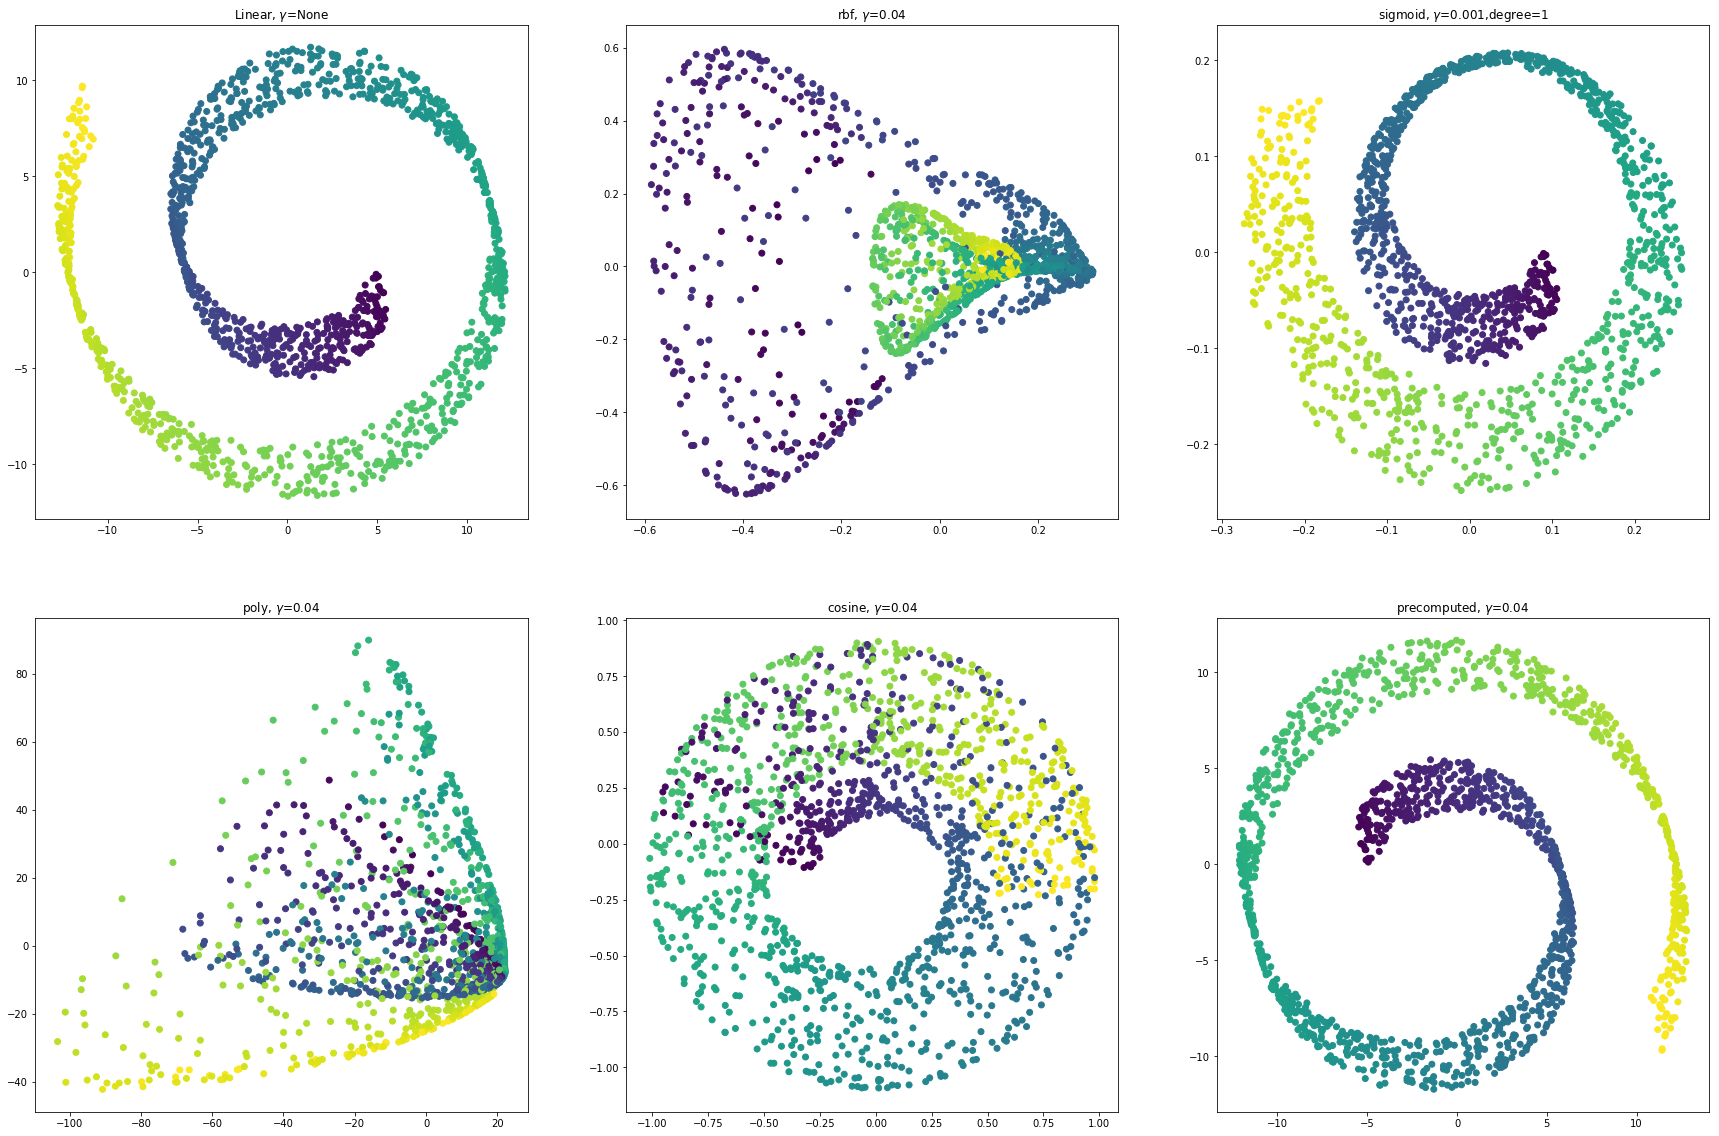

In [2]:
from sklearn.decomposition import KernelPCA
from sklearn import datasets,manifold
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)

plt.figure(figsize=(30,20), facecolor='w')
plt.subplot(2,3,1)
plt.title('Linear, $\gamma$=None')
pca = KernelPCA(n_components=2, kernel='linear')
x_linear = pca.fit_transform(X)
plt.scatter(x_linear[:,0], x_linear[:, 1], c = color)

plt.subplot(2,3,2)
plt.title('rbf, $\gamma$=0.04')
pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
x_rbf = pca.fit_transform(X)
plt.scatter(x_rbf[:,0], x_rbf[:, 1], c = color)

plt.subplot(2,3,3)
plt.title('sigmoid, $\gamma$=0.001,degree=1')
pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, degree=1)
x_sigmoid = pca.fit_transform(X)
plt.scatter(x_sigmoid[:,0], x_sigmoid[:, 1], c = color)

plt.subplot(2,3,4)
plt.title('poly, $\gamma$=0.04')
pca = KernelPCA(n_components=2, kernel='poly', gamma=0.04)
x_poly = pca.fit_transform(X)
plt.scatter(x_poly[:,0], x_poly[:, 1], c = color)

plt.subplot(2,3,5)
plt.title('cosine, $\gamma$=0.04')
pca = KernelPCA(n_components=2, kernel='cosine', gamma=0.04)
x_cosine = pca.fit_transform(X)
plt.scatter(x_cosine[:,0], x_cosine[:, 1], c = color)

plt.subplot(2,3,6)
plt.title('precomputed, $\gamma$=0.04')
pca = KernelPCA(n_components=2, kernel='precomputed', gamma=0.04)
x_precomputed = pca.fit_transform(np.dot(X, X.T))
plt.scatter(x_precomputed[:,0], x_precomputed[:, 1], c = color)